
# Project: E-Commerce Exploratory Data Analysis for VS Group


### After creating and populating the SQL database in Sprint 1, this section of the project focuses on exploratory data analysis (EDA) for VS Group, a U.S.-based e-commerce company. Using the cleaned and structured sales dataset from the database, the objective is to uncover customer purchasing patterns, identify trends in revenue and profit, and detect potential anomalies in the data. Key tasks include exploring temporal patterns (daily, monthly, quarterly), mapping top-performing and underperforming States, analyzing customer behavior, and understanding growth in the customer base.

### Based on this analysis, 2-4 meaningful Key Performance Indicators (KPIs) will be suggested to help VS Group monitor business performance and inform decision-making. The insights will be consolidated into an interactive Tableau dashboard to provide a clear and actionable overview for the management team. This sprint demonstrates practical BI skills in querying, data exploration, visualization, KPI formulation, and dashboard creation.




In [2]:
import pandas as pd
import calendar
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('/Users/kimberleybrown/Desktop/CODING_ALL/Code_Academy_Berlin/Module02/ecommerce_eda.csv')

In [4]:
df

,OrderID,RowID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,...,Category,SubCategory,ProductName,SupplierPrice,Quantity,SalePrice,Discount,Profit,OrderYear,OrderMonth
0,CA-2014-100006,2718,2014-09-07,9/13/2014,Standard Class,DK-13375,Dennis Kane,Consumer,United States,New York City,...,Technology,Phones,AT&T EL51110 DECT,89.45,3,377.97,0.0,109.61,2014,9
1,CA-2014-100090,6288,2014-07-08,7/12/2014,Standard Class,EB-13705,Ed Braxton,Corporate,United States,San Francisco,...,Furniture,Tables,Hon 2111 Invitation Series Corner Table,196.81,3,502.49,0.2,-87.94,2014,7
2,CA-2014-100090,6289,2014-07-08,7/12/2014,Standard Class,EB-13705,Ed Braxton,Corporate,United States,San Francisco,...,Office Supplies,Binders,"Wilson Jones Ledger-Size, Piano-Hinge Binder, ...",21.31,6,196.70,0.2,68.85,2014,7
3,CA-2014-100293,9515,2014-03-14,3/18/2014,Standard Class,NF-18475,Neil Französisch,Home Office,United States,Jacksonville,...,Office Supplies,Paper,Xerox 1887,9.86,6,91.06,0.2,31.87,2014,3
4,CA-2014-100328,3084,2014-01-28,2/3/2014,Standard Class,JC-15340,Jasper Cacioppo,Consumer,United States,New York City,...,Office Supplies,Binders,"Pressboard Covers with Storage Hooks, 9 1/2"" x...",2.60,1,3.93,0.2,1.33,2014,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,US-2017-169551,5931,2017-07-07,7/9/2017,First Class,RL-19615,Rob Lucas,Consumer,United States,Philadelphia,...,Office Supplies,Paper,Xerox 216,3.37,3,15.55,0.2,5.44,2017,7
9982,US-2017-169551,5933,2017-07-07,7/9/2017,First Class,RL-19615,Rob Lucas,Consumer,United States,Philadelphia,...,Office Supplies,Storage,Plastic Stacking Crates & Casters,4.13,3,13.39,0.2,1.00,2017,7
9983,US-2017-169551,5934,2017-07-07,7/9/2017,First Class,RL-19615,Rob Lucas,Consumer,United States,Philadelphia,...,Technology,Accessories,AmazonBasics 3-Button USB Wired Mouse,3.98,3,16.78,0.2,4.82,2017,7
9984,US-2017-169551,5935,2017-07-07,7/9/2017,First Class,RL-19615,Rob Lucas,Consumer,United States,Philadelphia,...,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,221.07,2,527.92,0.2,85.79,2017,7


# -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Cleaning

### Datetime

In [5]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

### Dropping OrderYear and ORderMonth, and creating a proper Year and Month column with the datetime information, 

In [6]:
df = df.drop(['OrderYear', 'OrderMonth'], axis=1)
df['OrderYear'] = df['OrderDate'].dt.year
df['OrderMonth'] = df['OrderDate'].dt.month
df['OrderQuarter'] = df['OrderMonth'].apply(lambda x: f'Q{((x-1)//3)+1}')
df['OrderWeekday'] = df['OrderDate'].dt.dayofweek.apply(lambda x: calendar.day_abbr[x])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9986 entries, 0 to 9985
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   OrderID        9986 non-null   object        
 1   RowID          9986 non-null   int64         
 2   OrderDate      9986 non-null   datetime64[ns]
 3   ShipDate       9986 non-null   object        
 4   ShipMode       9986 non-null   object        
 5   CustomerID     9986 non-null   object        
 6   CustomerName   9986 non-null   object        
 7   Segment        9986 non-null   object        
 8   Country        9986 non-null   object        
 9   City           9986 non-null   object        
 10  State          9986 non-null   object        
 11  PostalCode     9986 non-null   int64         
 12  Region         9986 non-null   object        
 13  AddressID      9986 non-null   int64         
 14  ProductID      9986 non-null   object        
 15  Category       9986 n

### Re Organise Column Order

In [7]:
# Define new column order, placing OrderYear and OrderMonth after OrderDate
new_order = [
    'RowID', 'OrderID', 'OrderDate', 'OrderWeekday', 'OrderMonth', 'OrderQuarter', 'OrderYear', 'ShipDate', 'ShipMode',
    'CustomerID', 'CustomerName', 'Segment', 'Country', 'City', 'State',
    'PostalCode', 'Region', 'AddressID', 'ProductID', 'Category', 'SubCategory',
    'ProductName', 'SupplierPrice', 'Quantity', 'SalePrice', 'Discount', 'Profit'
]

# Reorder the DataFrame
df = df[new_order]

# Check the new column order
print(df.columns)


Index(['RowID', 'OrderID', 'OrderDate', 'OrderWeekday', 'OrderMonth',
       'OrderQuarter', 'OrderYear', 'ShipDate', 'ShipMode', 'CustomerID',
       'CustomerName', 'Segment', 'Country', 'City', 'State', 'PostalCode',
       'Region', 'AddressID', 'ProductID', 'Category', 'SubCategory',
       'ProductName', 'SupplierPrice', 'Quantity', 'SalePrice', 'Discount',
       'Profit'],
      dtype='object')


# -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# GENERAL EDA

## eda: Analysing Time Range / Profit

### Profit by year

In [8]:
unique_years = df['OrderYear'].unique()
print("Unique years in the dataset:", unique_years)

Unique years in the dataset: [2014 2015 2016 2017]


In [9]:
profit_by_year = df.groupby('OrderYear')['Profit'].sum().reset_index()
print(profit_by_year)

   OrderYear    Profit
0       2014  49543.86
1       2015  61618.44
2       2016  81794.90
3       2017  93439.34


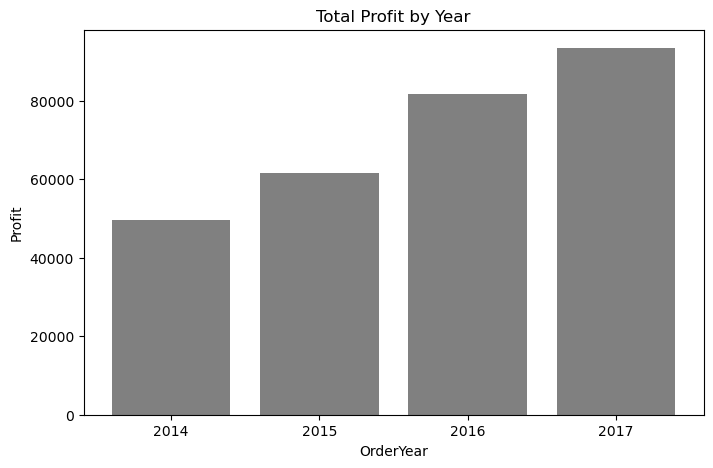

In [10]:
plt.figure(figsize=(8,5))
plt.bar(profit_by_year['OrderYear'], profit_by_year['Profit'], color='grey')
plt.title('Total Profit by Year')
plt.xlabel('OrderYear')
plt.ylabel('Profit')
plt.xticks(profit_by_year['OrderYear'])
plt.show()

### Profit by Quarter

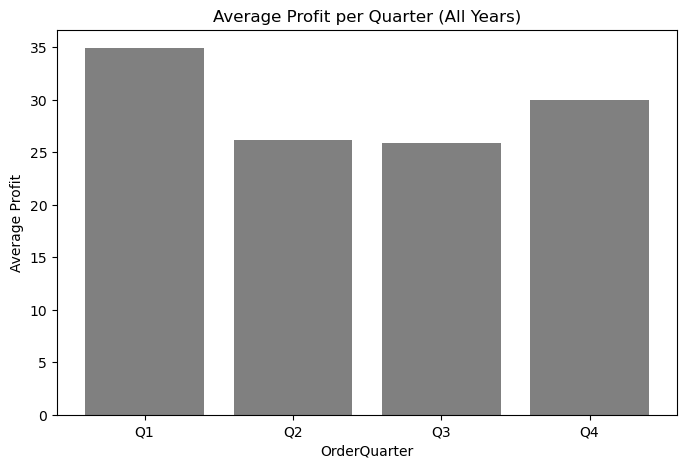

In [11]:
avg_profit_by_quarter = df.groupby('OrderQuarter')['Profit'].mean().reindex(['Q1','Q2','Q3','Q4']).reset_index()

plt.figure(figsize=(8,5))
plt.bar(avg_profit_by_quarter['OrderQuarter'], avg_profit_by_quarter['Profit'], color='grey')
plt.title('Average Profit per Quarter (All Years)')
plt.xlabel('OrderQuarter')
plt.ylabel('Average Profit')
plt.show()


### Profit By Month

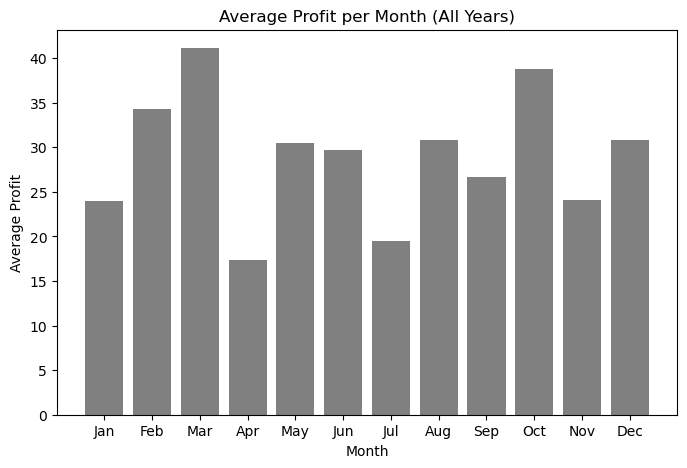

In [12]:
avg_profit_by_month = df.groupby('OrderMonth')['Profit'].mean().reset_index()

plt.figure(figsize=(8,5))
plt.bar(avg_profit_by_month['OrderMonth'], avg_profit_by_month['Profit'], color='Grey')
plt.title('Average Profit per Month (All Years)')
plt.xlabel('Month')
plt.ylabel('Average Profit')
plt.xticks(range(1, 13), [calendar.month_abbr[m] for m in range(1, 13)])
plt.show()


### Profit by Weekday

In [13]:
avg_profit_by_weekday = df.groupby('OrderWeekday')['Profit'].mean().reindex(
    ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
).reset_index()


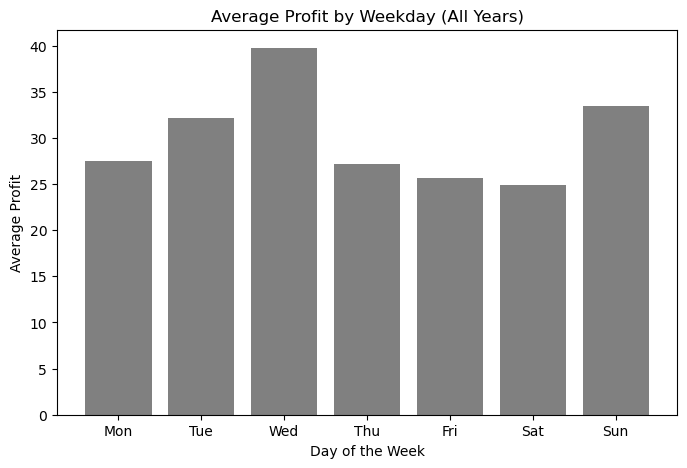

In [14]:
plt.figure(figsize=(8,5))
plt.bar(avg_profit_by_weekday['OrderWeekday'], avg_profit_by_weekday['Profit'], color='grey')
plt.title('Average Profit by Weekday (All Years)')
plt.xlabel('Day of the Week')
plt.ylabel('Average Profit')
plt.xticks(range(0, 7), [calendar.day_abbr[m] for m in range(0, 7)])
plt.show()

## -------------------

## eda: Analysing Customers Profit

### Profit by Segment by year

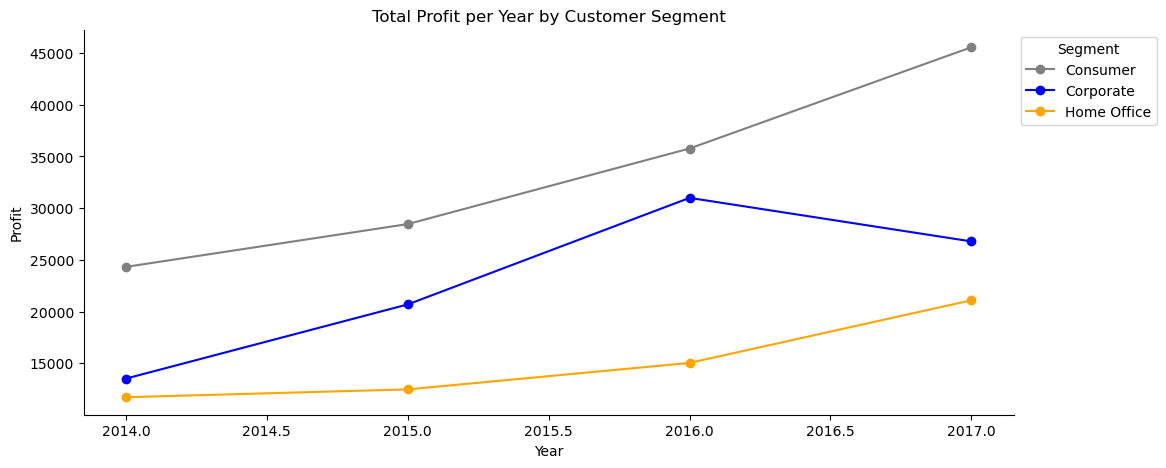

In [15]:
colors = {'Consumer':'grey', 'Corporate':'blue', 'Home Office':'orange'}

plt.figure(figsize=(12,5))  # wider figure


for segment in df['Segment'].unique():
    segment_data = df[df['Segment'] == segment].groupby('OrderYear')['Profit'].sum()
    plt.plot(segment_data.index, segment_data.values, marker='o', color=colors[segment], label=segment)

plt.title('Total Profit per Year by Customer Segment')
plt.xlabel('Year')
plt.ylabel('Profit')
plt.legend(title='Segment', loc='upper left', bbox_to_anchor=(1,1))

plt.grid(False)
sns.despine(top=True, right=True, left=False, bottom=False)

plt.show()

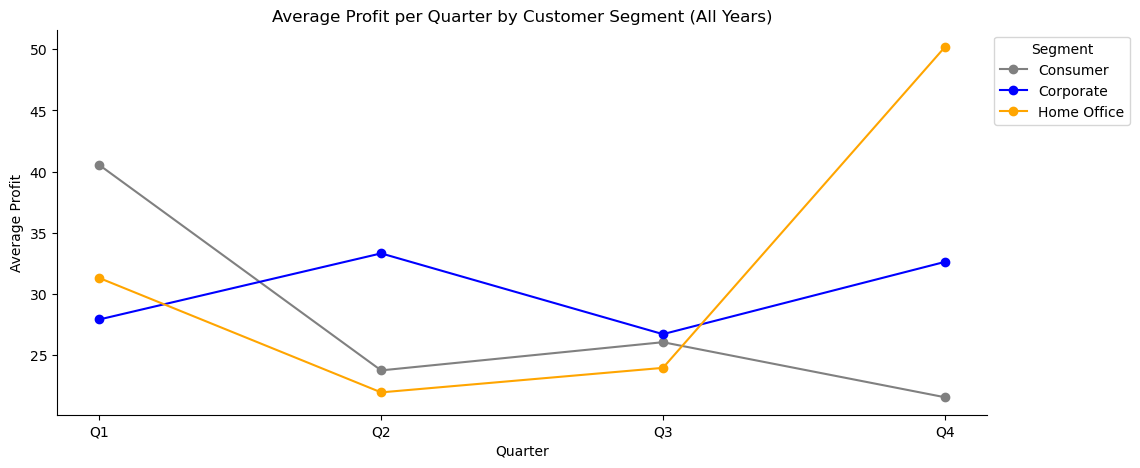

In [16]:
colors = {'Consumer':'grey', 'Corporate':'blue', 'Home Office':'orange'}
plt.figure(figsize=(12,5))  # wider figure

for segment in df['Segment'].unique():
    segment_data = (
        df[df['Segment'] == segment]
        .groupby('OrderQuarter')['Profit']
        .mean()
        .reindex(['Q1','Q2','Q3','Q4'])
    )
    plt.plot(segment_data.index, segment_data.values, marker='o', color=colors[segment], label=segment)

plt.title('Average Profit per Quarter by Customer Segment (All Years)')
plt.xlabel('Quarter')
plt.ylabel('Average Profit')
plt.legend(title='Segment', loc='upper left', bbox_to_anchor=(1,1))

plt.grid(False)
sns.despine(top=True, right=True, left=False, bottom=False)

plt.show()


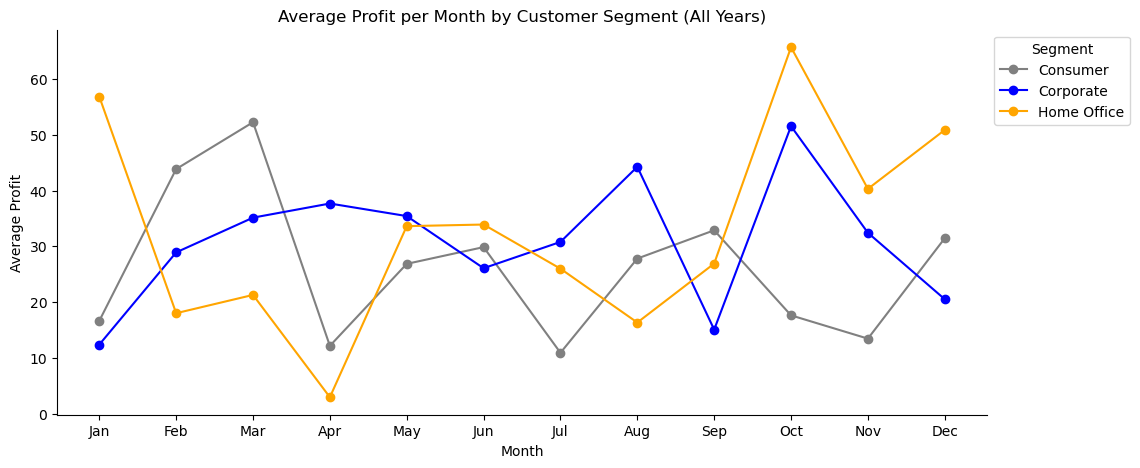

In [17]:
plt.figure(figsize=(12,5))  # wider figure

colors = {'Consumer':'grey', 'Corporate':'blue', 'Home Office':'orange'}

for segment in df['Segment'].unique():
    segment_data = df[df['Segment'] == segment].groupby('OrderMonth')['Profit'].mean()
    plt.plot(segment_data.index, segment_data.values, marker='o', color=colors[segment], label=segment)

plt.title('Average Profit per Month by Customer Segment (All Years)')
plt.xlabel('Month')
plt.ylabel('Average Profit')
plt.xticks(range(1,13), [calendar.month_abbr[m] for m in range(1,13)])  # month labels
plt.legend(title='Segment', loc='upper left', bbox_to_anchor=(1,1))

plt.grid(False)
sns.despine(top=True, right=True, left=False, bottom=False)

plt.show()


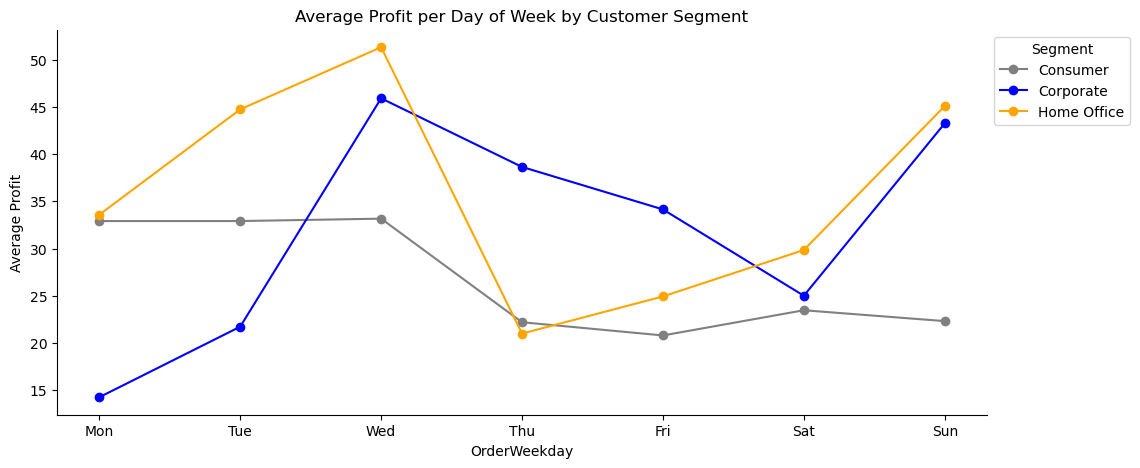

In [ ]:
weekday_order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

colors = {'Consumer':'grey', 'Corporate':'blue', 'Home Office':'orange'}

plt.figure(figsize=(12,5))  # wider figure

for segment in df['Segment'].unique():
    segment_data = df[df['Segment'] == segment].groupby('OrderWeekday')['Profit'].mean()
    segment_data = segment_data.reindex(weekday_order) 
    plt.plot(segment_data.index, segment_data.values, marker='o', color=colors[segment], label=segment)

plt.title('Average Profit per Day of Week by Customer Segment')
plt.xlabel('OrderWeekday')
plt.ylabel('Average Profit')
plt.legend(title='Segment', loc='upper left', bbox_to_anchor=(1,1))

plt.grid(False)
sns.despine(top=True, right=True, left=False, bottom=False)

plt.show()


1. Yearly trends

All segments show growth over the years, with Consumers showing the largest increase.

Corporate segment shows a decline between 2016 and 2017, which may indicate temporary loss of large clients or a shift in sales strategy.

2. Quarterly trends

Q1 and Q4 are the most dynamic quarters, with Q4 showing a spike in Home Office profit but a drop in Consumer profit, and Q1 having high Consumer profit.

Q2 and Q3 are relatively stable, suggesting steady but lower activity.

3. Monthly trends

January: spike in Home Office profit

March: spike in Consumer profit

October: spike in both Corporate and Home Office profit

April: lowest profits for Home Office, indicating a potential seasonal slowdown

4. Weekly trends

Home Office: highest on Wed & Sun, lowest on Thu

Corporate: peaks on Wed & Sun, lowest on Mon

Consumer: flatter curve, stronger at the start of the week

5. Overall insights

Yearly growth is consistent except for Corporate’s recent decline — potentially worth investigating.

End-of-year (Q4) performance is strong, but the Consumer segment drop may require targeted campaigns.

Specific months (Jan, Mar, Oct) and days (Sun–Wed) are key for strategic planning, promotions, or resource allocation.

## -------------------

## eda: Profit and Order Count by State and Customer Segment

### Which States and which customers made the highest number of orders? Are they the same as the highest spenders?

### Analyzing top 5 Profitable States

In [19]:
unique_states = df['State'].unique()
print("Unique states in the dataset:", unique_states)

Unique states in the dataset: ['New York' 'California' 'Florida' 'Arizona' 'Texas' 'Virginia' 'Michigan'
 'New Mexico' 'Georgia' 'Utah' 'Illinois' 'Washington' 'Pennsylvania'
 'South Carolina' 'Kentucky' 'Nevada' 'North Carolina' 'Indiana'
 'Delaware' 'Ohio' 'Mississippi' 'Wisconsin' 'Montana' 'Minnesota'
 'Massachusetts' 'New Jersey' 'Kansas' 'Tennessee' 'Nebraska' 'Alabama'
 'Missouri' 'Colorado' 'Arkansas' 'South Dakota' 'Oklahoma' 'Maryland'
 'Rhode Island' 'Oregon' 'Connecticut' 'Maine' 'Louisiana' 'Iowa'
 'Vermont' 'District of Columbia' 'New Hampshire' 'Idaho' 'Wyoming'
 'North Dakota' 'West Virginia']


In [20]:
profit_by_state = df.groupby('State')['Profit'].sum().reset_index()
top5_profitstates = profit_by_state.sort_values('Profit', ascending=False).head(5)
top5_profitstates

,State,Profit
3,California,76381.23
30,New York,74038.47
45,Washington,33402.64
20,Michigan,24463.10
44,Virginia,18597.99


### Analyzing top 5 amount Orders by State

In [21]:
orders_by_state = df.groupby('State')['OrderID'].count().reset_index()
orders_by_state
top5_orders_states = orders_by_state.sort_values('OrderID', ascending=False).head(5)
top5_orders_states

,State,OrderID
3,California,2001
30,New York,1127
41,Texas,985
36,Pennsylvania,587
45,Washington,506


### Conclusion: California, New York and Washington are both top 5 amount of orders and top 5 profitable states. Michigan and virginia are top 5 profitable but are not in the top 5 order amount/ Pensylvania and texas are in the top 5 orders but did not make th ecut to the top 5 profitable states. 

### Analyzing top profitable Consumer segments

In [22]:
unique_segments = df['Segment'].unique()
print("Unique segments in the dataset:", unique_segments)

Unique segments in the dataset: ['Consumer' 'Corporate' 'Home Office']


In [23]:
profit_by_segment = df.groupby('Segment')['Profit'].sum().reset_index()
top_profitsegments = profit_by_segment.sort_values('Profit', ascending=False)
top_profitsegments

,Segment,Profit
0,Consumer,134118.64
1,Corporate,91979.13
2,Home Office,60298.77


### Analyzing top amount Orders by Segment

In [24]:
orders_by_segment = df.groupby('Segment')['OrderID'].count().reset_index()
top_orders_segments = orders_by_segment.sort_values('OrderID', ascending=False)
top_orders_segments

,Segment,OrderID
0,Consumer,5189
1,Corporate,3019
2,Home Office,1778


### Conclusion: Amount of orders is directly related to profit on Segment data. 

## -------------------

## eda: Can you make a map showing the 5 States generating the most and least sales revenue?

# -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


# CANCELLED: KPI EDA: Q4 Consumer Profit Target

### Avarage Profit per Q for Consumer Segment


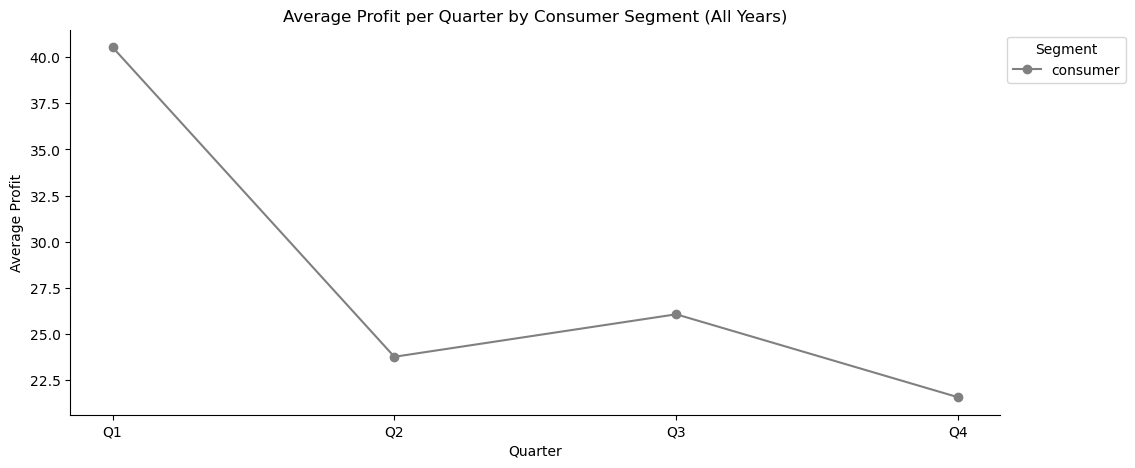

In [27]:
plt.figure(figsize=(12,5))  # wider figure

consumer_data = df[df['Segment'] == 'Consumer'].groupby('OrderQuarter')['Profit'].mean().reindex(['Q1','Q2','Q3','Q4'])
plt.plot(consumer_data.index, consumer_data.values, marker='o', color='grey', label='consumer')

plt.title('Average Profit per Quarter by Consumer Segment (All Years)')
plt.xlabel('Quarter')
plt.ylabel('Average Profit')
plt.legend(title='Segment', loc='upper left', bbox_to_anchor=(1,1))

plt.grid(False)
sns.despine(top=True, right=True, left=False, bottom=False)

plt.show()


### Analyse Consumer Quarterly per year

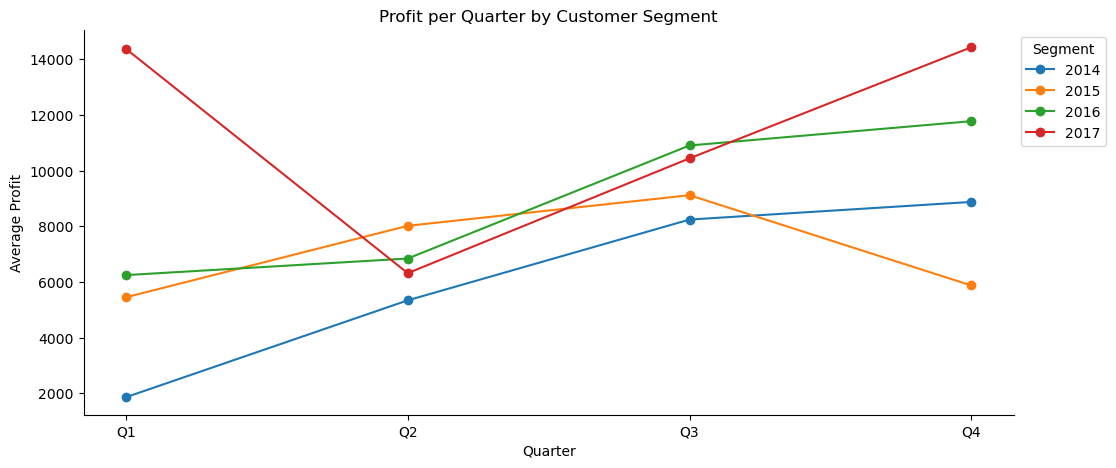

In [48]:
plt.figure(figsize=(12,5))  # wider figure
#  color=colors[segment], label=segment)

colors = {'2014':'grey', '2015':'blue', '2016':'orange', '2017':'red'}

for year in df['OrderYear'].unique():
    consumer_per_year = df[(df['OrderYear'] == year) & (df['Segment'] == 'Consumer')].groupby('OrderQuarter')['Profit'].sum()
    plt.plot(consumer_per_year.index, consumer_per_year.values, marker='o', label=year)

plt.title('Profit per Quarter by Customer Segment')
plt.xlabel('Quarter')
plt.ylabel('Average Profit')
plt.legend(title='Segment', loc='upper left', bbox_to_anchor=(1,1))

plt.grid(False)
sns.despine(top=True, right=True, left=False, bottom=False)

plt.show()


### KPI Conclusion

#### It seems like in recent years Q4 has been performing as well as Q1, the reason why the average over the years is still down is because of past years. After carefull research we realised that we biggest challenge is now to improve the performance on Q2.

# -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# KPI EDA: Q2 Consumer Profit Target

### Avarage Profit per Q for Consumer Segment

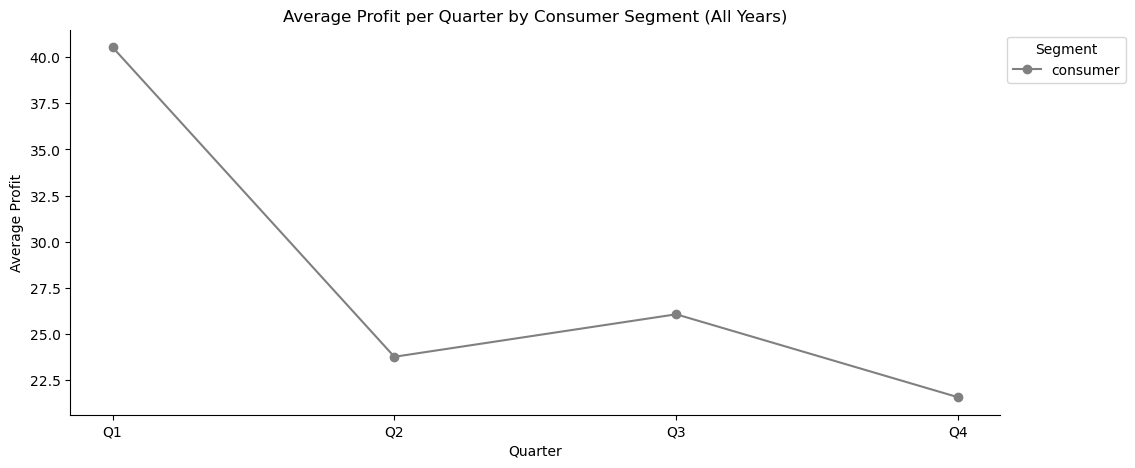

In [49]:
plt.figure(figsize=(12,5))  # wider figure

consumer_data = df[df['Segment'] == 'Consumer'].groupby('OrderQuarter')['Profit'].mean().reindex(['Q1','Q2','Q3','Q4'])
plt.plot(consumer_data.index, consumer_data.values, marker='o', color='grey', label='consumer')

plt.title('Average Profit per Quarter by Consumer Segment (All Years)')
plt.xlabel('Quarter')
plt.ylabel('Average Profit')
plt.legend(title='Segment', loc='upper left', bbox_to_anchor=(1,1))

plt.grid(False)
sns.despine(top=True, right=True, left=False, bottom=False)

plt.show()


### Analyse Consumer Quarterly per year

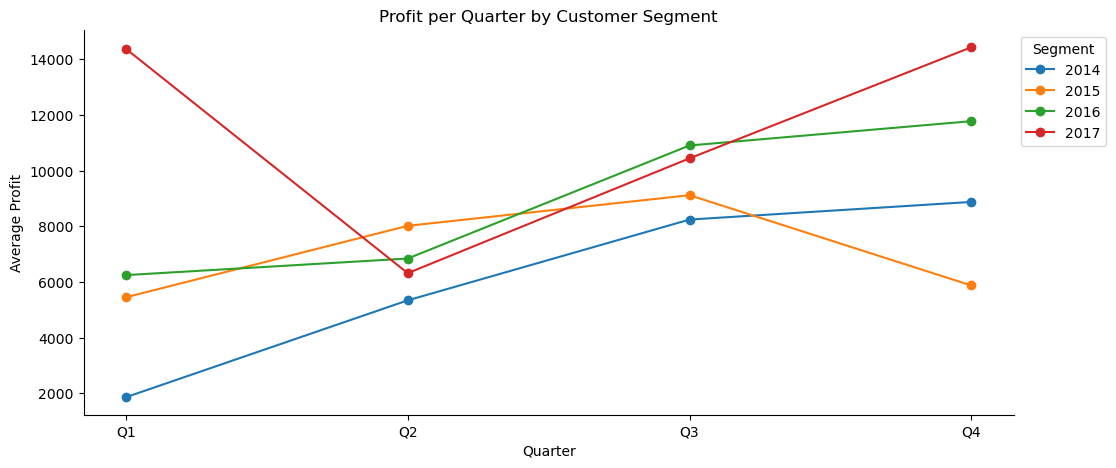

In [50]:
plt.figure(figsize=(12,5))  # wider figure
#  color=colors[segment], label=segment)

colors = {'2014':'grey', '2015':'blue', '2016':'orange', '2017':'red'}

for year in df['OrderYear'].unique():
    consumer_per_year = df[(df['OrderYear'] == year) & (df['Segment'] == 'Consumer')].groupby('OrderQuarter')['Profit'].sum()
    plt.plot(consumer_per_year.index, consumer_per_year.values, marker='o', label=year)

plt.title('Profit per Quarter by Customer Segment')
plt.xlabel('Quarter')
plt.ylabel('Average Profit')
plt.legend(title='Segment', loc='upper left', bbox_to_anchor=(1,1))

plt.grid(False)
sns.despine(top=True, right=True, left=False, bottom=False)

plt.show()


### KPI Conclusion

Objective: Improve Consumer segment performance in Q2.

KPI: Achieve total Q2 profit of €10,000, up from the historical maximum of €8,000.

Historical data shows Q2 has underperformed, with a peak profit of €8,000. Setting a target of €10,000 establishes a stretch goal, encouraging initiatives to boost sales, optimize pricing, or increase customer engagement specifically in Q2.


Specific
* Q2 historically underperforms in the Consumer segment, peaking at €8,000.
* The goal is to increase total Consumer profit in Q2 to €10,000, directly addressing the weakest quarter.

Measurable
* Metric: Total Q2 Consumer profit ≥ €10,000.
* Progress can be tracked cumulatively throughout Q2, with weekly or monthly checkpoints.

Achievable
* Based on past data, Q2 has reached €8,000, so a €10,000 target is a stretch but realistic goal.
* Achievability can be supported through targeted promotions, marketing campaigns, or optimizing pricing strategies in Q2.

Relevant
* Increasing Q2 profit reduces seasonal dips, strengthens yearly revenue, and leverages the largest segment (Consumer) for maximum business impact.
* Aligns directly with your insight that Q2 is now the key growth opportunity.

Time-bound
* The target applies to the current Q2 period.
* Intermediate monitoring can occur monthly to track progress and implement corrective actions as needed.